<a href="https://colab.research.google.com/github/DarkSchneider/Exercises/blob/main/lab2_Risoluzione_di_sistemi_lineari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title <h1>Lab 2 : Risoluzione di sistemi lineari  </h1>
%%html
<marquee style='width: 50%; color: red;'><b>Questi esercizi possono essere chiesto all'esame!</b></marquee>

# **MATRICI e NORME**

---
Considera la matrice A
\begin{equation*}
A = 
\begin{pmatrix}
1 & 2  \\
0.499  & 1.001  
\end{pmatrix}
\end{equation*}

* Calcola la norma 1, la norma 2, la norma Frobenius e la norma infinito di A con ${\tt numpy.linalg.norm()}$ (guarda l'help della funzione).
* Calcola il numero di condizionamento di A con ${\tt numpy.linalg.cond()}$ (guarda l'help della funzione).
* Considera il vettore colonna $x = (1,1)^T$ e calcola il corrispondente termine noto $b$ per il sistema lineare $Ax = b$.
* Considera ora il vettore ${\tilde b} = (3, 1.4985)^T$ e verifica che ${\tilde x} = (2, 0.5)^T$ è soluzione del sistema $A{\tilde x} = {\tilde b}$
* Calcola la norma 2 della perturbazione sui termini noti $ \Delta_b  = \| b - {\tilde b} \|_2$ e la norma 2 della perturbazione sulle soluzioni $ \Delta_x = \| x - {\tilde x} \|_2$. Confronta $\Delta_b$ con $\Delta_x$.


In [2]:
import numpy as np
import sys

# https://numpy.org/doc/stable/reference/

In [3]:
# import the important module in python
import numpy as np
         
# make a matrix with numpy
gfg1 = np.matrix('[1, 2, 3; 4, 5, 6; 7, 8, 9]')
gfg2 = 3
         
# applying matrix.dot() method
geeks = gfg1.dot(gfg2)
   
print(geeks)

[[ 3  6  9]
 [12 15 18]
 [21 24 27]]


In [4]:
#help(np.linalg) # View source

help (np.linalg.norm)
#help (np.dot)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these

In [5]:
A = np.array([[1, 2], [0.499, 1.001]])
print ('Norme di A:')

norm1 = np.linalg.norm(A,1)
norm2 = np.linalg.norm(A,2)
normfro = np.linalg.norm(A, 'fro')
norminf = np.linalg.norm(A, np.inf)

print('Norma1 = ', norm1, '\n')
print('Norma2 = ', norm2, '\n')
print('Normafro = ', normfro, '\n')
print('Norma infinito = ', norminf, '\n')

cond1 = np.linalg.cond(A, 1)
cond2 = np.linalg.cond(A, 2)
condfro = np.linalg.cond(A, 'fro')
condinf = np.linalg.cond(A, np.inf)

print ('K(A)_1 = ', cond1, '\n')
print ('K(A)_2 = ', cond2, '\n')
print ('K(A)_fro =', condfro, '\n')
print ('K(A)_inf =', condinf, '\n')

x = np.array([[1], [1]])
x = np.ones((2, 1))
x = np.array([1, 1]).T

# Ax = b

b = A.dot(x)
print('b=', b)
btilde = np.array([[3], [1.4985]])
#xtilde = np.array([[2], [0.5]])
xtilde = np.array([[2, 0.5]]).T

# Verificare che xtilde è soluzione di A xtilde = btilde
# A * xtilde = btilde
print ('A*xtilde = ', A.dot(xtilde) , '\n')

deltax = np.linalg.norm(x-xtilde, ord=2)
deltab = np.linalg.norm(b-btilde, ord=2)

print ('delta x = ', deltax)
print ('delta b = ', deltab)

Norme di A:
Norma1 =  3.001 

Norma2 =  2.500200104037774 

Normafro =  2.5002003919686118 

Norma infinito =  3.0 

K(A)_1 =  3001.0000000001082 

K(A)_2 =  2083.6668534103555 

K(A)_fro = 2083.6673333334084 

K(A)_inf = 3001.0000000001082 

b= [3.  1.5]
A*xtilde =  [[3.    ]
 [1.4985]] 

delta x =  1.58113883008419
delta b =  1.5018108475780652


# **METODI DIRETTI**

---

La soluzione viene calcolata in un numero finito di passi, modificando la matrice del problema in modo da rendere piú agevole il calcolo della soluzione.

*   Con matrici triangolari: metodi di sostituzione;
*   Con qualsiasi matrice: metodo di eliminazione di Gauss;
*   Con matrici simmetriche: metodo di Cholesky.


# Esercizio 1

Considera la matrice
\begin{equation*}
A = 
\begin{pmatrix}
3 & -1 & 1 & -2 \\
0 & 2  & 5 & -1 \\
1 & 0  &-7 &  1 \\
0 & 2  & 1 &  1  
\end{pmatrix}
\end{equation*}

1. Crea il problema test in cui il vettore della soluzione esatta è $ x = (1, 1, 1, 1)^T$ e il vettore termine noto è $b = Ax$.
2. Guarda l'help del modulo ${\tt scipy.linalg.decomp\_lu}$ e usa una delle sue funzioni per calcolare la fattorizzazione LU di A con pivolting. Verifica la correttezza dell'output.
3. Risolvi il sistema lineare con la funzione ${\tt lu\_solve}$ del modulo decomp_lu oppure con ${\tt scipy.linalg.solve\_triangular}$.
4. Visualizza la soluzione calcolata e valutane la correttezza.



In [6]:
#this only affects numpy arrays, not scalars
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})  # oppure np.set_printoptions(precision=4)

In [7]:
# 1. creazione del problema test

A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ], dtype=np.float)

print (A)
n= np.linalg.cond(A, 2)
print ('K(A) = ', n)

x = np.array([1,1,1,1]).T
b = A.dot(x)

print('b= ', b,'\n')


[[3.00 -1.00 1.00 -2.00]
 [0.00 2.00 5.00 -1.00]
 [1.00 0.00 -7.00 1.00]
 [0.00 2.00 1.00 1.00]]
K(A) =  14.208370392921388
b=  [1.00 6.00 -5.00 4.00] 



In [8]:
import scipy.linalg
help (scipy.linalg.decomp_lu)

# DESCRIPTION
#    SciPy: A scientific computing package for Python
#    Documentation is available in the docstrings and online at https://docs.scipy.org.
# https://docs.scipy.org/doc/scipy/reference/

Help on module scipy.linalg.decomp_lu in scipy.linalg:

NAME
    scipy.linalg.decomp_lu - LU decomposition functions.

FUNCTIONS
    lu(a, permute_l=False, overwrite_a=False, check_finite=True)
        Compute pivoted LU decomposition of a matrix.
        
        The decomposition is::
        
            A = P L U
        
        where P is a permutation matrix, L lower triangular with unit
        diagonal elements, and U upper triangular.
        
        Parameters
        ----------
        a : (M, N) array_like
            Array to decompose
        permute_l : bool, optional
            Perform the multiplication P*L  (Default: do not permute)
        overwrite_a : bool, optional
            Whether to overwrite data in a (may improve performance)
        check_finite : bool, optional
            Whether to check that the input matrix contains only finite numbers.
            Disabling may give a performance gain, but may result in problems
            (crashes, non-terminati

In [9]:
import scipy.linalg
# help (scipy.linalg)
import scipy.linalg.decomp_lu as LUdec # è un module, con ['lu', 'lu_solve', 'lu_factor']
help (scipy.linalg.decomp_lu)

Help on module scipy.linalg.decomp_lu in scipy.linalg:

NAME
    scipy.linalg.decomp_lu - LU decomposition functions.

FUNCTIONS
    lu(a, permute_l=False, overwrite_a=False, check_finite=True)
        Compute pivoted LU decomposition of a matrix.
        
        The decomposition is::
        
            A = P L U
        
        where P is a permutation matrix, L lower triangular with unit
        diagonal elements, and U upper triangular.
        
        Parameters
        ----------
        a : (M, N) array_like
            Array to decompose
        permute_l : bool, optional
            Perform the multiplication P*L  (Default: do not permute)
        overwrite_a : bool, optional
            Whether to overwrite data in a (may improve performance)
        check_finite : bool, optional
            Whether to check that the input matrix contains only finite numbers.
            Disabling may give a performance gain, but may result in problems
            (crashes, non-terminati

In [10]:
# 2. fattorizzazione lu
p,l,u = LUdec.lu(A)
print(p)
print(l)
print(u)

[[1.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00]
 [0.00 0.00 1.00 0.00]
 [0.00 0.00 0.00 1.00]]
[[1.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00]
 [0.33 0.17 1.00 0.00]
 [0.00 1.00 0.49 1.00]]
[[3.00 -1.00 1.00 -2.00]
 [0.00 2.00 5.00 -1.00]
 [0.00 0.00 -8.17 1.83]
 [0.00 0.00 0.00 1.10]]


In [11]:
 # 3. risoluzione
# Ax = b   <--->  PLUx = b  <--->  LUx = inv(P)b  <--->  Ly=inv(P)b & Ux=y : matrici triangolari
# Ax = b   <--->  PLUx = b  <--->  PLy=b & Ux=y : PL matrice non triangolare

lu, piv = LUdec.lu_factor(A)
my_x = LUdec.lu_solve((lu, piv), b)
print(my_x)


[1.00 1.00 1.00 1.00]


In [12]:
# 4. verifica 
print('\nSoluzione calcolata: ',my_x)
n=np.size(my_x)
for i in range(n):
    print('%0.4f' %my_x[i])

print(np.linalg.norm(x-my_x, 2))


Soluzione calcolata:  [1.00 1.00 1.00 1.00]
1.0000
1.0000
1.0000
1.0000
7.021666937153402e-16


In [13]:
# IMPLEMENTAZIONE ALTERNATIVA 

# fattorizzazione
p,l,u = LUdec.lu(A)
# risoluzione di    Ax = b   <--->  PLUx = b  <--->  PLy=b & Ux=y  <--->  Ly=Pb & Ux=y
invP = np.linalg.inv(p)
b_piv = np.matmul(invP, b)
y = scipy.linalg.solve_triangular(l,b_piv, lower=True)
my_x = scipy.linalg.solve_triangular(u,y)

# verifica
print('\nSoluzione calcolata: ', my_x)
n = np.size(my_x)
for i in range(n):
    print('%0.2f' %my_x[i])


Soluzione calcolata:  [1.00 1.00 1.00 1.00]
1.00
1.00
1.00
1.00


# Esercizio 2

Ripeti l'esercizio 1 sulla matrice di Hilbert, creata con ${\tt A = scipy.linalg.hilbert(n)}$ per $n=5,\ldots,10$. In particolare:
* calcola il numero di condizionamento di A
* Considera il vettore colonna $x = (1,\ldots,1)^T$, calcola il corrispondente termine noto $b$ per il sistema lineare $Ax = b$ e la relativa soluzione $\tilde{x}$ usando la fattorizzazione LU come nel caso precedente.

In [14]:
n=5
A = scipy.linalg.hilbert(n)
print(A)
x = np.array(np.ones((n,1)))
print(x)
b = A.dot(x)
print('b =\n', b,)
lu, piv = LUdec.lu_factor(A)
x_tilde = LUdec.lu_solve((lu, piv), b)
print('x tilde = \n', x_tilde)

[[1.00 0.50 0.33 0.25 0.20]
 [0.50 0.33 0.25 0.20 0.17]
 [0.33 0.25 0.20 0.17 0.14]
 [0.25 0.20 0.17 0.14 0.12]
 [0.20 0.17 0.14 0.12 0.11]]
[[1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]]
b =
 [[2.28]
 [1.45]
 [1.09]
 [0.88]
 [0.75]]
x tilde = 
 [[1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]]


# Esercizio 3
Scrivi le due funzioni ${\tt LTrisol()}$ e ${\tt UTrisol()}$ per implementare i metodi di sostituzione all'avanti e all'indietro, poi:
* usa la fattorizzazione ${\tt P, L, U = LUdec.lu(A) }$ sulla matrice degli esercizi precedenti;
* risolvi i sistemi triangolari usando la tue funzioni.



In [15]:
help(range)

Help on class range in module builtins:

class range(object)
 |  range(stop) -> range object
 |  range(start, stop[, step]) -> range object
 |  
 |  Return an object that produces a sequence of integers from start (inclusive)
 |  to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
 |  start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
 |  These are exactly the valid indices for a list of 4 elements.
 |  When step is given, it specifies the increment (or decrement).
 |  
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |

In [16]:
# y = LTrisol(L,b)
# my_x = UTrisol(U,y)

def LTrisol(L,b):
  n=b.size
  x=np.zeros(n)
  x[0]=  b[0]/L[0,0]
  for i in range(1,n):
    x[i]= (b[i]-np.dot(x[0:i],L[i,0:i]))/L[i,i]
    #L(i,i) dovrebbe sempre essere 1 per qualsiasi i dato che sulla diagonale di L ci sono sempre 1, quindi dovrebbe essere inutile fare /L[i,i]
  return x

def UTrisol(U,b):
  n=b.size
  x=np.zeros(n)
  x[n-1]=  b[n-1]/U[n-1,n-1]
  for i in range(n-2,-1,-1):
    x[i]= (b[i]-np.dot(U[i,i+1:n],x[i+1:n]))/U[i,i]
  return x

A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ], dtype=np.float)
n = A.shape[1]
x = np.ones( (n,1) )
b = np.dot(A,x)

p,l,u = LUdec.lu(A)


# Ax = b   <--->  PLUx = b  <--->  LUx = invPb  <--->  Ly=invPb & Ux=y
Pinv = np.linalg.inv(p)
y = LTrisol(l, np.matmul(Pinv,b) )
my_x = UTrisol(u,y)

print('\nSoluzione parziale y:' )
for i in range(n):
    print('%0.2f' %y[i])
print('\nSoluzione calcolata:' )
for i in range(n):
    print('%0.2f' %my_x[i])


Soluzione parziale y:
1.00
6.00
-6.33
1.10

Soluzione calcolata:
1.00
1.00
1.00
1.00


# Esercizio 4

Comprendere i seguenti codici che implementano la fattorizzazione LU senza pivoting.

In [17]:
# LU senza pivoting

def LU_fact_NOpiv(A):
  a = np.copy(A)
  n=a.shape[1]
  
  for k in range(n-1):
    if a[k, k] != 0:
      a[k+1:, k] = a[k+1:, k]/a[k,k]
      
      a1 = np.expand_dims(a[k+1:, k], 1)
      a2 = np.expand_dims(a[k, k+1:], 0)
      a[k+1:, k+1:] = a[k+1:, k+1:] - (a1 * a2)
  return a

Usa np.expand_dims per poter avere le righe e le colonne come array bidimensionali per poter fare la moltiplicazione elemento per elemento delle due matrici dopo

In [18]:
help(np.newaxis)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



# Esercizio 5
Calcola la fattorizzazione di Choleski sulla matrice A generata come

${\tt A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ], dtype=np.float)}$
${\tt A = np.matmul( A, np.transpose(A) )}$

usando la funzione ${\tt np.linalg.cholesky}$.
* Verifica la correttezza della fattorizzazione.
* Risolvi il sistema lineare Ax = b dove ${\tt x = (1, 1, 1, 1)^T}$ . 

In [19]:
x=np.arange(3)
print(x[:,np.newaxis].shape)

(3, 1)


In [20]:
help(np.linalg.cholesky)

Help on function cholesky in module numpy.linalg:

cholesky(a)
    Cholesky decomposition.
    
    Return the Cholesky decomposition, `L * L.H`, of the square matrix `a`,
    where `L` is lower-triangular and .H is the conjugate transpose operator
    (which is the ordinary transpose if `a` is real-valued).  `a` must be
    Hermitian (symmetric if real-valued) and positive-definite. No
    checking is performed to verify whether `a` is Hermitian or not.
    In addition, only the lower-triangular and diagonal elements of `a`
    are used. Only `L` is actually returned.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Hermitian (symmetric if all elements are real), positive-definite
        input matrix.
    
    Returns
    -------
    L : (..., M, M) array_like
        Upper or lower-triangular Cholesky factor of `a`.  Returns a
        matrix object if `a` is a matrix object.
    
    Raises
    ------
    LinAlgError
       If the decomposition fails, for ex

# **METODI ITERATIVI**

---

Calcolo di una soluzione come limite di una successione di approssimazioni $x_k$, senza modificare la struttura della matrice A. Sono metodi adatti per sistemi di grandi dimensioni con matrici sparse (pochi elementi non nulli).
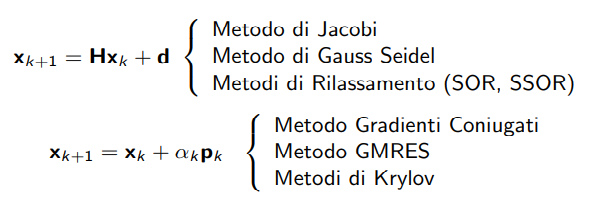

# Esercizio 6

Scrivi le funzioni 
${\tt Jacobi(A,b,x0,maxit,tol, xTrue)}$ e ${\tt GaussSeidel(A,b,x0,maxit,tol, xTrue)}$
per implementare i metodi di Jacobi e di Gauss Seidel per la risoluzione di sistemi lineari con matrice a diagonale dominante. In particolare:
* ${\tt x0}$ sia l'iterato iniziale;
* la condizione d'arresto sia dettata dal numero massimo di iterazioni consentite ${\tt maxit}$ e dalla tolleranza ${\tt tol}$ sulla differenza relativa fra due iterati successivi;
* si preveda in input la soluzione esatta ${\tt xTrue}$ per calcolare l'errore relativo ad ogni iterazione.

Entrambe le funzioni restituiscano in output:
* la soluzione ${\tt x}$;
* il numero ${\tt k}$ di iterazioni effettuate;
* il vettore ${\tt relErr}$ di tutti gli errori relativi.


In [31]:
def Jacobi(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x = np.copy(x0)
  relErr=np.zeros((maxit, 1))
  errIter=np.zeros((maxit, 1))
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  errIter[0]=tol+1
  while(ite<maxit and errIter[ite]>tol):
    x_old=np.copy(x)
    for i in range(0,n):
      x[i]= ( b[i] - np.dot(A[i,0:i],x_old[0:i]) - np.dot(A[i,i+1:n],x_old[i+1:n]) ) / A[i,i]
    ite=ite+1
    relErr[ite] = np.linalg.norm(xTrue - x)/np. linalg.norm(xTrue)
    errIter[ite] = np.linalg.norm(x-x_old)/np.linalg.norm(x)
  relErr=relErr[:ite]
  errIter=errIter[:ite]
  return [x, ite, relErr]

In [32]:
def GaussSeidel(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)
  ite=0 
  x = np.copy(x0)
  relErr=np.zeros((maxit,1))
  errIter=np.zeros((maxit,1))
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  errIter[0]=tol+1
  while ite<maxit and  errIter[ite]>tol:
    x_old=np.copy(x)
    for i in range(0,n):
      x[i] = ( b[i] -  np.dot(A[i,0:i], x[0:i]) - np.dot(A[i,i+1:n], x_old[i+1:n]) )/ A[i,i]
    ite=ite+1
    relErr[ite]=np.linalg.norm(xTrue - x)/np.linalg.norm(xTrue)
    errIter[ite]=np.linalg.norm(x - x_old)/np.linalg.norm(x)
  relErr=relErr[:ite]
  errIter=errIter[:ite]
  return [x, ite, relErr]

#Esercizio 7
Testa le due funzioni dell'esercizio precedente per risolvere il sistema lineare Ax = b dove A è la matrice 10x10
\begin{equation*}
A = 
\begin{pmatrix}
5 & 1 & 0 & 0 & ... & 0 \\
1 & 5 & 1 & 0 & ... & 0 \\
0 & 1 & \ddots & \ddots & \vdots & \vdots \\
0 & 0 & \ddots & 5 & 1 & 0 \\
0 & 0 & ... & 1 &  5  & 1 \\
0 & 0 & ... & 0 &  1  & 5 \\
\end{pmatrix}
\end{equation*}
e ${\tt x = (1, 1, ..., 1)^T}$ la soluzione esatta.

Confronta i due metodi e grafica in un unico plot i due vettori ${\tt relErr}$.


In [23]:
A = np.dot(5, np.eye(10)) + np.eye(10, k=1) + np.eye(10, k=-1)

print(A)

xTrue = np.ones((1,10))
print(xTrue)

[[5.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [1.00 5.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 1.00 5.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 1.00 5.00 1.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 1.00 5.00 1.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 1.00 5.00 1.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 1.00 5.00 1.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 1.00 5.00 1.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 5.00 1.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 5.00]]
[[1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00]]


In [36]:
n = 10


A = np.dot(5, np.eye(10)) + np.eye(10, k=1) + np.eye(10, k=-1)

xTrue = np.ones((10,1))
b = np.dot(A, xTrue)


x0 = np.zeros((10,1))
maxit = 200
tol= 1.e-6
(xJacobi, kJacobi, relErrJacobi) = Jacobi(A,b,x0,maxit,tol,xTrue) 
(xGS, kGS, relErrGS) = GaussSeidel(A,b,x0,maxit,tol,xTrue) 

print('\nSoluzione calcolata da Jacobi:' )
for i in range(n):
    print('%0.2f' %xJacobi[i])

print('\nSoluzione calcolata da Gauss Seidel:' )
for i in range(n):
    print('%0.2f' %xGS[i])


Soluzione calcolata da Jacobi:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00

Soluzione calcolata da Gauss Seidel:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00


Errore relativo Jacobi:  0.00044161
Errore relativo Gauss-Sidel:  0.00000107


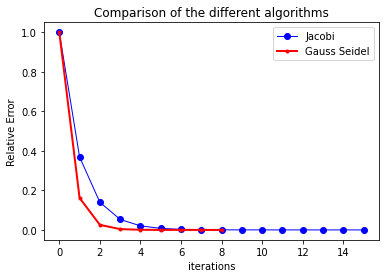

In [50]:
# CONFRONTI

print('Errore relativo Jacobi: ','%0.8f' %relErrJacobi[n-2])
print('Errore relativo Gauss-Sidel: ','%0.8f' %relErrGS[n-2])

# Confronto grafico degli errori di Errore Relativo

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

rangeJacobi = range (0, kJacobi)
rangeGS = range(0, kGS)

ax.plot(rangeJacobi, relErrJacobi, label='Jacobi', color='blue', linewidth=1, marker='o'  )
ax.plot(rangeGS, relErrGS, label='Gauss Seidel', color = 'red', linewidth=2, marker='.' )
legend = ax.legend(loc='upper right')
plt.xlabel('iterations')
plt.ylabel('Relative Error')
plt.title('Comparison of the different algorithms')
plt.show()

